<a href="https://colab.research.google.com/github/hasnainroopawalla/Doodle-Classifier/blob/master/Doodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download the 'classes.txt' file containing all 345 classes
OR
Download the '100_classes.txt' containing 100 classes**

In [1]:
#!wget 'https://raw.githubusercontent.com/hasnainroopawalla/Doodle-Classifier/master/all_classes.txt'
!wget 'https://raw.githubusercontent.com/hasnainroopawalla/Doodle-Classifier/master/100_classes.txt'

--2020-01-13 17:20:17--  https://raw.githubusercontent.com/hasnainroopawalla/Doodle-Classifier/master/100_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘100_classes.txt’

100_classes.txt     100%[===================>]     760  --.-KB/s    in 0s      

2020-01-13 17:20:22 (210 MB/s) - ‘100_classes.txt’ saved [760/760]



In [2]:
#f = open("all_classes.txt","r")
f = open("100_classes.txt","r")
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)

['drums', 'sun', 'laptop', 'anvil', 'baseball_bat', 'ladder', 'eyeglasses', 'grapes', 'book', 'dumbbell', 'traffic_light', 'wristwatch', 'wheel', 'shovel', 'bread', 'table', 'tennis_racquet', 'cloud', 'chair', 'headphones', 'face', 'eye', 'airplane', 'snake', 'lollipop', 'power_outlet', 'pants', 'mushroom', 'star', 'sword', 'clock', 'hot_dog', 'syringe', 'stop_sign', 'mountain', 'smiley_face', 'apple', 'bed', 'shorts', 'broom', 'diving_board', 'flower', 'spider', 'cell_phone', 'car', 'camera', 'tree', 'square', 'moon', 'radio', 'hat', 'pizza', 'axe', 'door', 'tent', 'umbrella', 'line', 'cup', 'fan', 'triangle', 'basketball', 'pillow', 'scissors', 't-shirt', 'tooth', 'alarm_clock', 'paper_clip', 'spoon', 'microphone', 'candle', 'pencil', 'envelope', 'saw', 'frying_pan', 'screwdriver', 'helmet', 'bridge', 'light_bulb', 'ceiling_fan', 'key', 'donut', 'bird', 'circle', 'beard', 'coffee_cup', 'butterfly', 'bench', 'rifle', 'cat', 'sock', 'ice_cream', 'moustache', 'suitcase', 'hammer', 'rain

**Create a folder called 'data' to store all dataset images**

In [0]:
!mkdir data

**Download images for 345 (or 100) classes and store it in the 'data' folder**

In [4]:
import urllib.request
base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
class_num = 0
for c in classes:
  class_num +=1
  print(class_num,c)
  cls_url = c.replace('_', '%20')
  path = base+cls_url+'.npy'
  urllib.request.urlretrieve(path, 'data/'+c+'.npy')

1 drums
2 sun
3 laptop
4 anvil
5 baseball_bat
6 ladder
7 eyeglasses
8 grapes
9 book
10 dumbbell
11 traffic_light
12 wristwatch
13 wheel
14 shovel
15 bread
16 table
17 tennis_racquet
18 cloud
19 chair
20 headphones
21 face
22 eye
23 airplane
24 snake
25 lollipop
26 power_outlet
27 pants
28 mushroom
29 star
30 sword
31 clock
32 hot_dog
33 syringe
34 stop_sign
35 mountain
36 smiley_face
37 apple
38 bed
39 shorts
40 broom
41 diving_board
42 flower
43 spider
44 cell_phone
45 car
46 camera
47 tree
48 square
49 moon
50 radio
51 hat
52 pizza
53 axe
54 door
55 tent
56 umbrella
57 line
58 cup
59 fan
60 triangle
61 basketball
62 pillow
63 scissors
64 t-shirt
65 tooth
66 alarm_clock
67 paper_clip
68 spoon
69 microphone
70 candle
71 pencil
72 envelope
73 saw
74 frying_pan
75 screwdriver
76 helmet
77 bridge
78 light_bulb
79 ceiling_fan
80 key
81 donut
82 bird
83 circle
84 beard
85 coffee_cup
86 butterfly
87 bench
88 rifle
89 cat
90 sock
91 ice_cream
92 moustache
93 suitcase
94 hammer
95 rainbow
96 k

**Import all necessary packages**

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
import tensorflow as tf
from PIL import Image, ImageOps
import cv2
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

**Select 4000 (or any number) random images for each class and split data into train and test**

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class = 16000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)
        print(len(class_names))

    data = None
    labels = None
    
    ## Randomize dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #Split dataset into train and test
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

**Print number of classes and train images**

In [18]:
print('Number of Classes:',num_classes)
print('Train Images:',len(x_train))

Number of Classes: 100
Train Images: 1280000


**Print random image (and its class) from training set**

donut


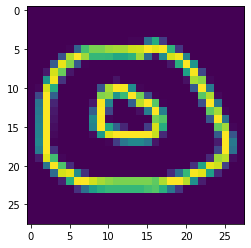

In [22]:
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

**Reshape and normalize each train and test image to 28x28 if not already**

In [23]:
image_size = 28
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape[1:])

(28, 28, 1)


**Define Model Architecture**

In [24]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))  # The number here should be equal to number of classes

opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

**Train the model**

In [25]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=1, epochs=10)

Train on 1152000 samples, validate on 128000 samples
Epoch 1/10
1152000/1152000 [==============================] - 24s 21us/sample - loss: 1.3460 - top_k_categorical_accuracy: 0.8713 - val_loss: 0.9998 - val_top_k_categorical_accuracy: 0.9183
Epoch 2/10
1152000/1152000 [==============================] - 23s 20us/sample - loss: 0.9162 - top_k_categorical_accuracy: 0.9273 - val_loss: 0.8854 - val_top_k_categorical_accuracy: 0.9292
Epoch 3/10
1152000/1152000 [==============================] - 23s 20us/sample - loss: 0.8294 - top_k_categorical_accuracy: 0.9352 - val_loss: 0.8247 - val_top_k_categorical_accuracy: 0.9361
Epoch 4/10
1152000/1152000 [==============================] - 24s 21us/sample - loss: 0.7846 - top_k_categorical_accuracy: 0.9395 - val_loss: 0.7927 - val_top_k_categorical_accuracy: 0.9381
Epoch 5/10
1152000/1152000 [==============================] - 23s 20us/sample - loss: 0.7553 - top_k_categorical_accuracy: 0.9420 - val_loss: 0.7777 - val_top_k_categorical_accuracy: 0.93

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 94.29%


**Use random test images to test the model**

['sword', 'knife', 'airplane', 'baseball_bat', 'pencil']


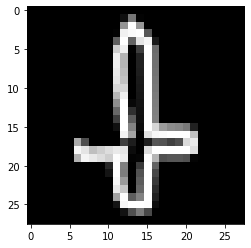

In [34]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze(),cmap='Greys_r') 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [0]:
model.save('keras.h5')

### Prediction on Input image

**Load the Model for predictions**

In [37]:
model = tf.keras.models.load_model('keras.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Make predictions on any input image**

['sun', 'light_bulb', 'lightning', 'spider', 'line']


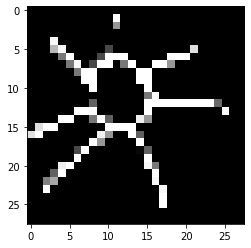

In [39]:
img = load_img('b.png', target_size=(28,28))
img = ImageOps.invert(img)
plt.imshow(img) 
img_tensor = img_to_array(img)

plt.imshow(img_tensor/255)

img_tensor = cv2.cvtColor(img_tensor, cv2.COLOR_BGR2GRAY) # Convert  channel to 1 (grayscale)
img_tensor = np.expand_dims(img_tensor, axis=2) # Add last channel as 1  (28,28) to (28,28,1)
img_tensor = np.expand_dims(img_tensor, axis=0) # Add 1 more channel at start to specify number of input images (1,28,28,1)
img_tensor /= 255. 

#print(img_tensor.shap

pred = model.predict(img_tensor)[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)
